# Lab 1

In [24]:
# All imports:
from matplotlib.figure import Figure
from numpy.fft import fft2, ifft2, fftshift
from scipy.signal import convolve2d
from pick import pick

from Functions import *
from fftwave import fftwave

# Section 1

## Section 1.3 
This block contains some of the pre-work files used to understand the functions. 

Fhat


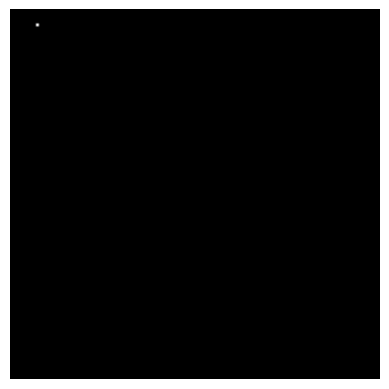

real part


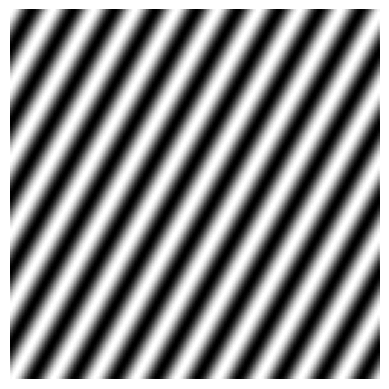

imaginary part


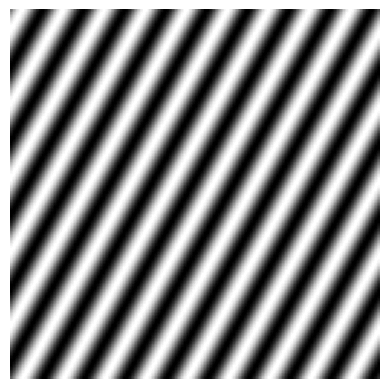

magnitude


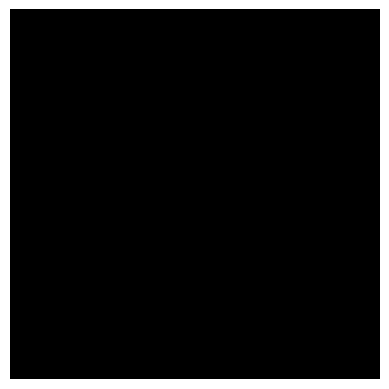

phase


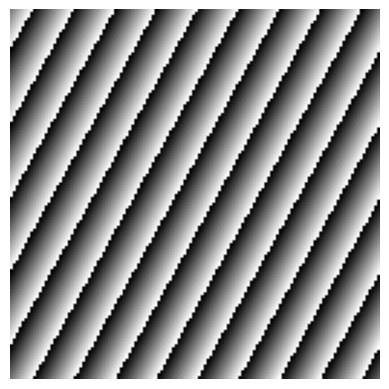

In [25]:
# This is used to set the values for p and q
p = 5
q = 9

# function is zero everywhere except point (p,q).
Fhat = np.zeros((128, 128))
Fhat[p, q] = 1

# this is used to show the image
print("Fhat")
showgrey(Fhat, True)

# compute inverse discrete fourier transfom
F = ifft2(Fhat)

# to look at the real and imaginary parts as well as magnitude
# and phase
Fabsmax = np.max(np.abs(F))
print("real part")
showgrey(np.real(F), True, 64, -Fabsmax, Fabsmax)
print("imaginary part")
showgrey(np.imag(F), True, 64, -Fabsmax, Fabsmax)
print("magnitude")
showgrey(np.abs(F), True, 64, -Fabsmax, Fabsmax)
print("phase")
showgrey(np.angle(F), True, 64, -np.pi, np.pi)

### Question 1
Repeat this exercise with the coordinates p and q set to (5, 9), (9, 5), (17, 9), (17, 121),(5, 1) and (125, 1) respectively. What do you observe?

**Answer**  <br>
I'd assume that X axis is the horizontal frequencies and Y axis is the vertical frequencies. The larger the values, the less frequent the wave is. The smaller the values, the more frequent the wave is. Combination of both produces a diagonal sine wave. <br> 

**Fhat:** Shows the frequency component lies on the frequency plane given that the top left corner denotes zero frequency.<br>

**Centered $\hat{F}:$** Shows the frequency component lies on the frequency plane given that the center denotes zero frequency.<br> 

**Real** Corresponds to the cosine component of the fourier transform and denotes the magnitude of the signal. <br>

**Imaginary** Corresponds to the sine component of the fourier transform and denotes the phase of the signal. <br>

**Absolute** Corresponds to the magnitude of the fourier transform. <br>

**Angle** This is the wavelength of the Fourier transform. <br>

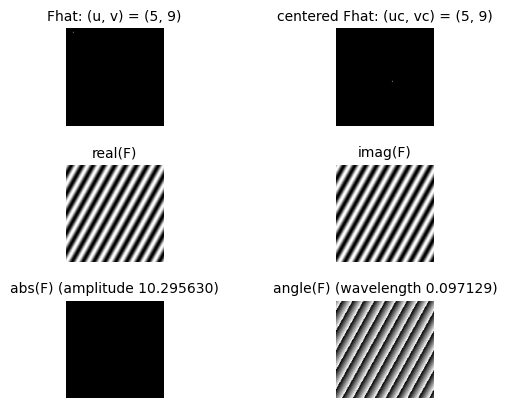

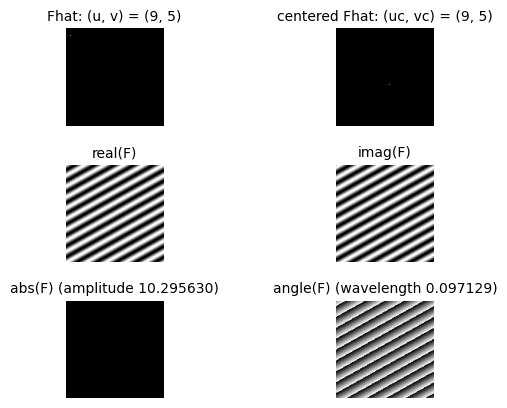

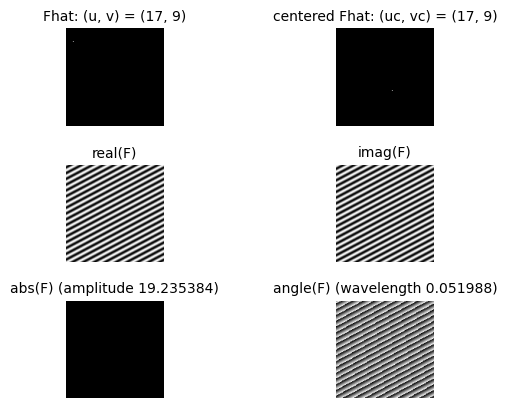

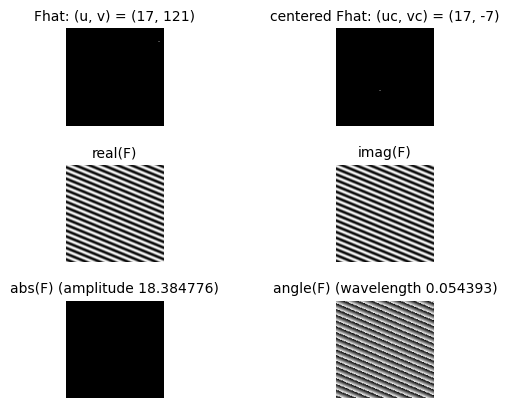

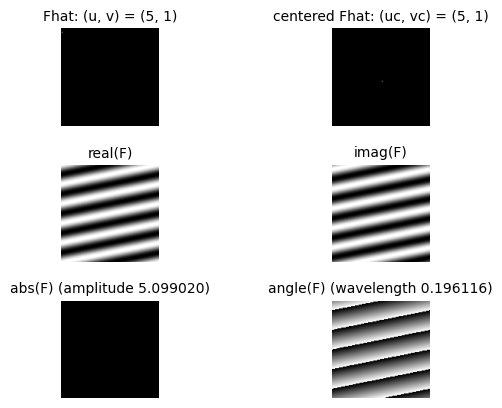

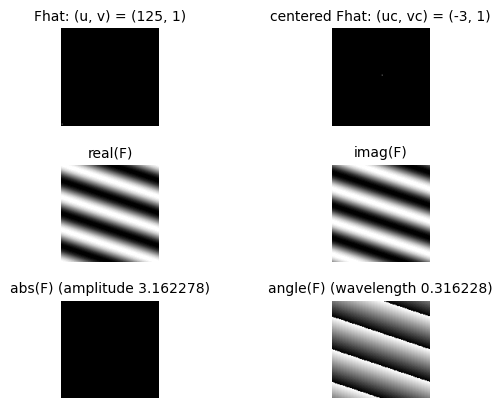

In [26]:
def question1():
    points = [(5, 9), (9, 5), (17, 9), (17, 121), (5, 1), (125, 1)]

    for point in points:
        fftwave(point[0], point[1])

question1()

### Question 2: 
Explain how a position (p, q) in the Fourier domain will be projected as a sine wave in the spatial domain. Illustrate with a figure.

**Answer** <br>
The position represents the frequency and orientation of the sinusoidal waves. The below equation represents the inverse Fourier transform in the discrete domain. <br>
$F(x) = \frac{1}{N}\sum_{u\in[0:N-1]^2} \hat(F) \exp(\frac{2(\pi)iu^Tx}{N}) $ <br> 
Applying the inverse Fourier transform at the point (p,q), we get,<br>
$F(x) = \frac{1}{N}\exp(\frac{2(\pi)i(p,q)^Tx}{N}) $ <br>
The below equation shows the Euler identity formula. <br>
$\exp(i\omega^Tx) = cos(\omega^Tx) + isin(\omega^Tx)$ <br>
By applying the Euler Identity to the inverse Fourier transform, we get, <br>
$F(x) = \frac{1}{N}cos(\frac{2\pi(p,q)^Tx}{N}) + i\frac{1}{N}sin(\frac{2\pi(p,q)^Tx}{N})$ <br> 

From my understanding, a single point in the Fourier domain represents one sine wave in the spatial domain. Below is a figure that illustrates that. 

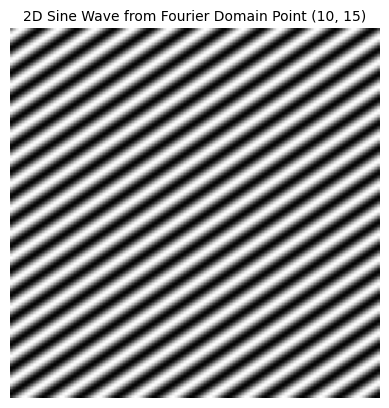

In [27]:
def question2(p, q, size):
    x = np.arange(size)
    y = np.arange(size)
    X, Y = np.meshgrid(x, y)

    # Create a 2D Sine wave
    sine_wave = np.sin(2 * np.pi * (p * X + q * Y) / size)

    plt.imshow(sine_wave, cmap="gray")
    plt.title(f"2D Sine Wave from Fourier Domain Point ({p}, {q})")
    plt.axis("off")
    plt.show()


question2(10,15,128)

### Question 3: 
How large is the amplitude? Write down the expression derived from Equation (4) in these notes. Complement the code (variable amplitude) accordingly
- The amplitute of the signal is given by 
$$
Amplitute = \sqrt{\mathbb{Re^2[\hat{f}(u,v)]} + Im^2[\hat{f}(u,v)]}$$

The below equation represents the inverse Fourier transform in the discrete domain. <br>
$F(x) = \frac{1}{N}\sum_{u\in[0:N-1]^2} \hat(F) \exp(\frac{2(\pi)iu^Tx}{N}) $ <br> 
Applying the inverse Fourier transform at the point (p,q), we get,<br>
$F(x) = \frac{1}{N}\exp(\frac{2(\pi)i(p,q)^Tx}{N}) $ <br>
By applying the Euler Identity to the inverse Fourier transform, we get, <br>
$F(x) = \frac{1}{N}cos(\frac{2\pi(p,q)^Tx}{N}) + i\frac{1}{N}sin(\frac{2\pi(p,q)^Tx}{N})$ <br>
The amplitude of the inverse Fourier Transform is,
$Amplitude = \frac{1}{N}\sqrt{cos^2(\frac{2\pi(p,q)^Tx}{N}) + sin^2(\frac{2\pi(p,q)^Tx}{N})}$ <br>
$Amplitude = \frac{1}{N}\sqrt{1}$ <br>
$Amplitude = \frac{1}{N}$ <br>

### Question 4: 
How does the direction and length of the sine wave depend on p and q? Write down the explicit expression that can be found in the lecture notes. Complement the code (variable wavelength) accordingly

**Answer** <br>

- The angle of the signal is given by 
$$ \theta = tan^{-1} \frac{u}{v} $$ 
- where 
$$(p = u) \vee (q = v)  $$
- and the wavelength of the signal is given by:
$$ \lambda = \frac{1}{\sqrt{u^2 + v^2}} $$

### Question 5:
What happens when we pass the point in the center and either p or q exceeds half the image size? Explain and illustrate graphically with a figure!

**Answer** <br>
The function is periodic where the zero frequency is centered. If p or q is greater than half the image size, the and p coordinates becomes p-N or q-N respectively. This will create an aliasing effect as it exceeds Nyquist frequency. Below is a figure that illustrates that. 

### Question 6 
What is the purpose of the instructions following the question: *What is done by these instructions? in the code?*

**Answer** <br>
It gives the coordinates for the x and y frequency components after centering the zero frequency. on the graph. 


## Section 1.4 Linearity 
This block contains some of the pre-work files used to understand the functions.


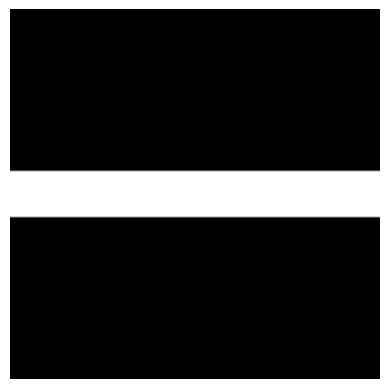

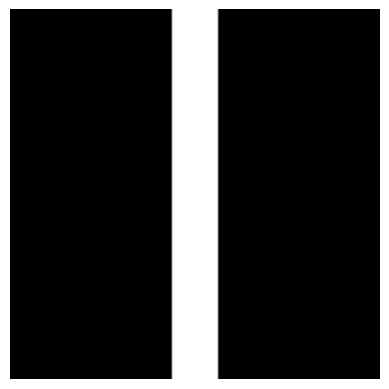

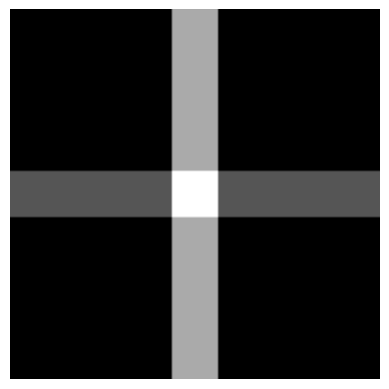

In [28]:
F = np.concatenate([np.zeros((56, 128)), np.ones((16, 128)), np.zeros((56, 128))])
G = F.T
H = F + 2 * G

showgrey(F, True)
showgrey(G, True)
showgrey(H, True)


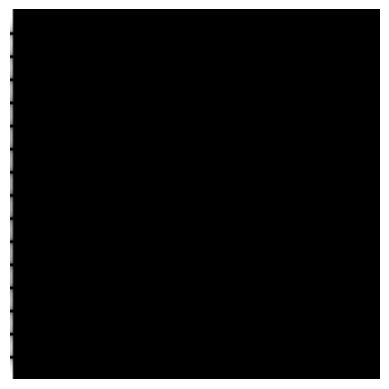

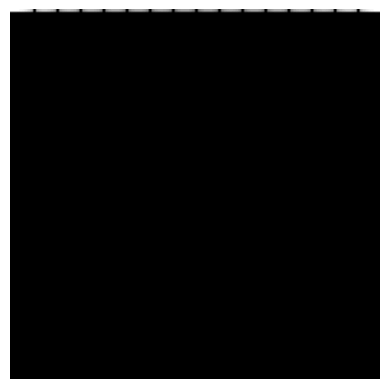

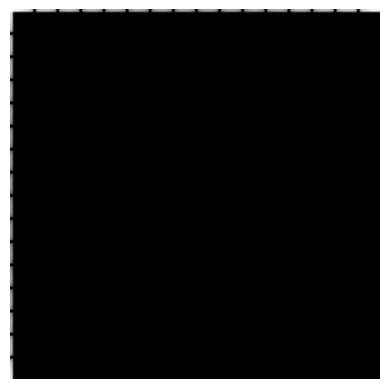

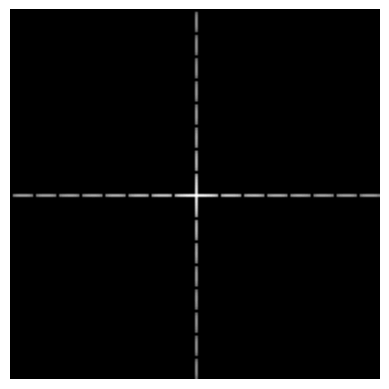

In [29]:
Fhat = fft2(F)
Ghat = fft2(G)
Hhat = fft2(H)

showgrey(np.log(1 + np.abs(Fhat)))
showgrey(np.log(1 + np.abs(Ghat)))
showgrey(np.log(1 + np.abs(Hhat)))

showgrey(np.log(1 + np.abs(fftshift(Hhat))))

### Question 7
Why are these Fourier spectra concentrated to the borders of the images? Can you give a mathematical interpretation? Hint: think of the frequencies in the source image and consider the resulting image as a Fourier transform applied to a 2D function. It might be easier to analyze each dimension separately!

**Answer** <br>
The images is a rectangular function. The Fourier transform of a rectangular function is a sinc function. The sinc function is a periodic function that is centered at the origin. The sinc function is a low pass filter that is concentrated at the borders of the image. Mathematically it can be views as a discrete fourier transform of a rectangular function. Here:
$$
f(x,y) = \begin{cases}
1 & \text{if } 56 \leq y \leq 72 \\
0 & \text{otherwise}
\end{cases}
$$

$$
\hat{F} = \sum_{x=0}^{N-1} \sum_{y=0}^{N-1} f(x,y) \exp(-2\pi i \frac{u}{N}x) \exp(-2\pi i \frac{v}{N}y)

### Question 8: 
Why is the logarithm function applied 

**Answer** <br>
The logarithm function is applied to the Fourier transform to make the image more visible. The logarithm function is used to compress the dynamic range of the image. 

### Question 9
What conclucions can be drawn regarding linearity? From your observations cna you derive a mathmatical expression in the general case.?

**Answer** <br>
Not done yet 

### Section 1.5 Multiplication:
This block contains some of the pre-work files used to understand the functions.

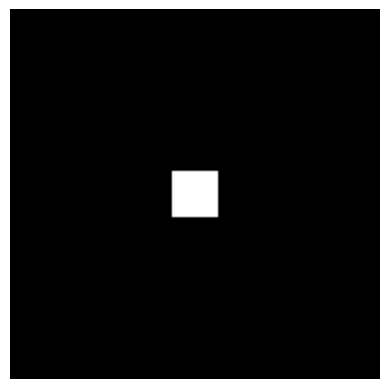

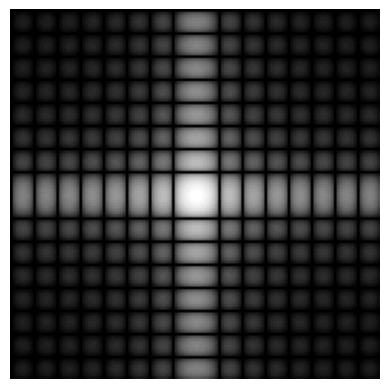

In [30]:
F = np.concatenate([np.zeros((56, 128)), np.ones((16, 128)), np.zeros((56, 128))])
G = F.T
showgrey(F * G)
showfs(fft2(F * G))

### Question 10
Are there any other ways to compute the last image? Remember what multiplication in Fourier domain equals to in the spatial domain! Try to perform these alternative computations in practice, if you want.

**Answer** <br>
We make use of the convolution theorem. The convolution theorem states that convolution in the spatial domain is the same as mutliplication in the Fourier domain and vice versa. The below equation represents the convolution theorem. <br>

$$
f(x) * g(x) \leftrightarrow F(u)G(u)
$$

$$ 


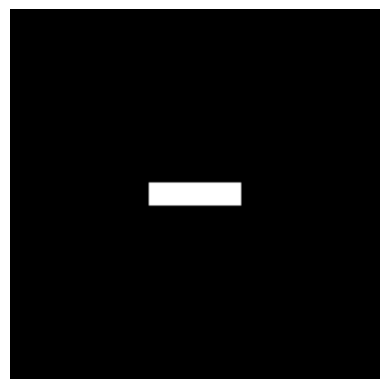

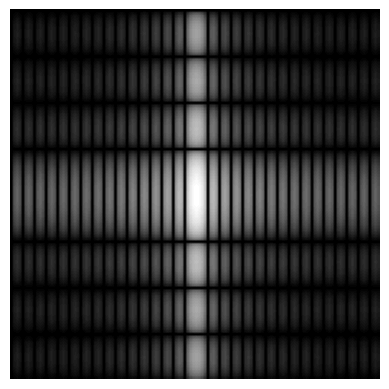

In [31]:
F = np.concatenate(
    [np.zeros((60, 128)), np.ones((8, 128)), np.zeros((60, 128))]
) * np.concatenate(
    [np.zeros((128, 48)), np.ones((128, 32)), np.zeros((128, 48))], axis=1
)

showgrey(F)

showfs(fft2(F)) 

### Question 11: 
What conclusions can be drawn from comparing the results with those in the previous exercise? See how the source images have changed and analyze the effects of scaling.

**Answer** <br>
Scaling down in spatial domain is equivalent to scaling up in the frequency domain. Scaling up in the spatial domain is equivalent to scaling down in the frequency domain.


### 1.7 Rotation
Below is the code for rotation. 

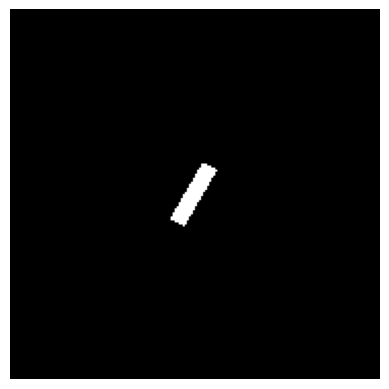

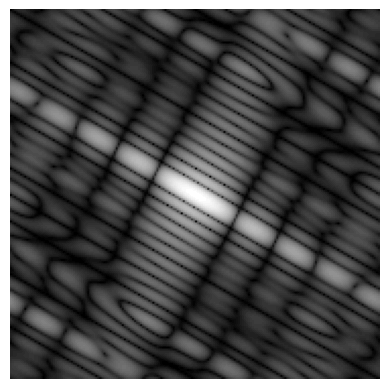

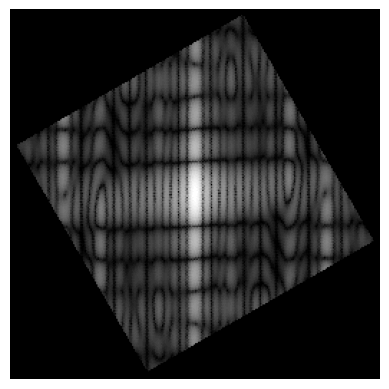

In [32]:
alpha = 60
G = rot(F, alpha)
showgrey(G)
Ghat = fft2(G)
showfs(Ghat)

Hhat = rot(fftshift(Ghat), -alpha)
showgrey(np.log(1 + abs(Hhat)))


### Question 12
What can be said about possible similarities and differences? Hint: think of the frequencies and how they are affected by the rotation?

**Answer** <br>
A rotation in the spatial domain becomes a rotation in the frequency domain and this is seen in the pictures. Phase and and magnitude are are kept the same. Some information seems to be lost as the edges are not smooth. Most likely creates noise.

## 1.8 Information in Fourier phase and magnitude
Below is the code for the information in Fourier phase and magnitude.

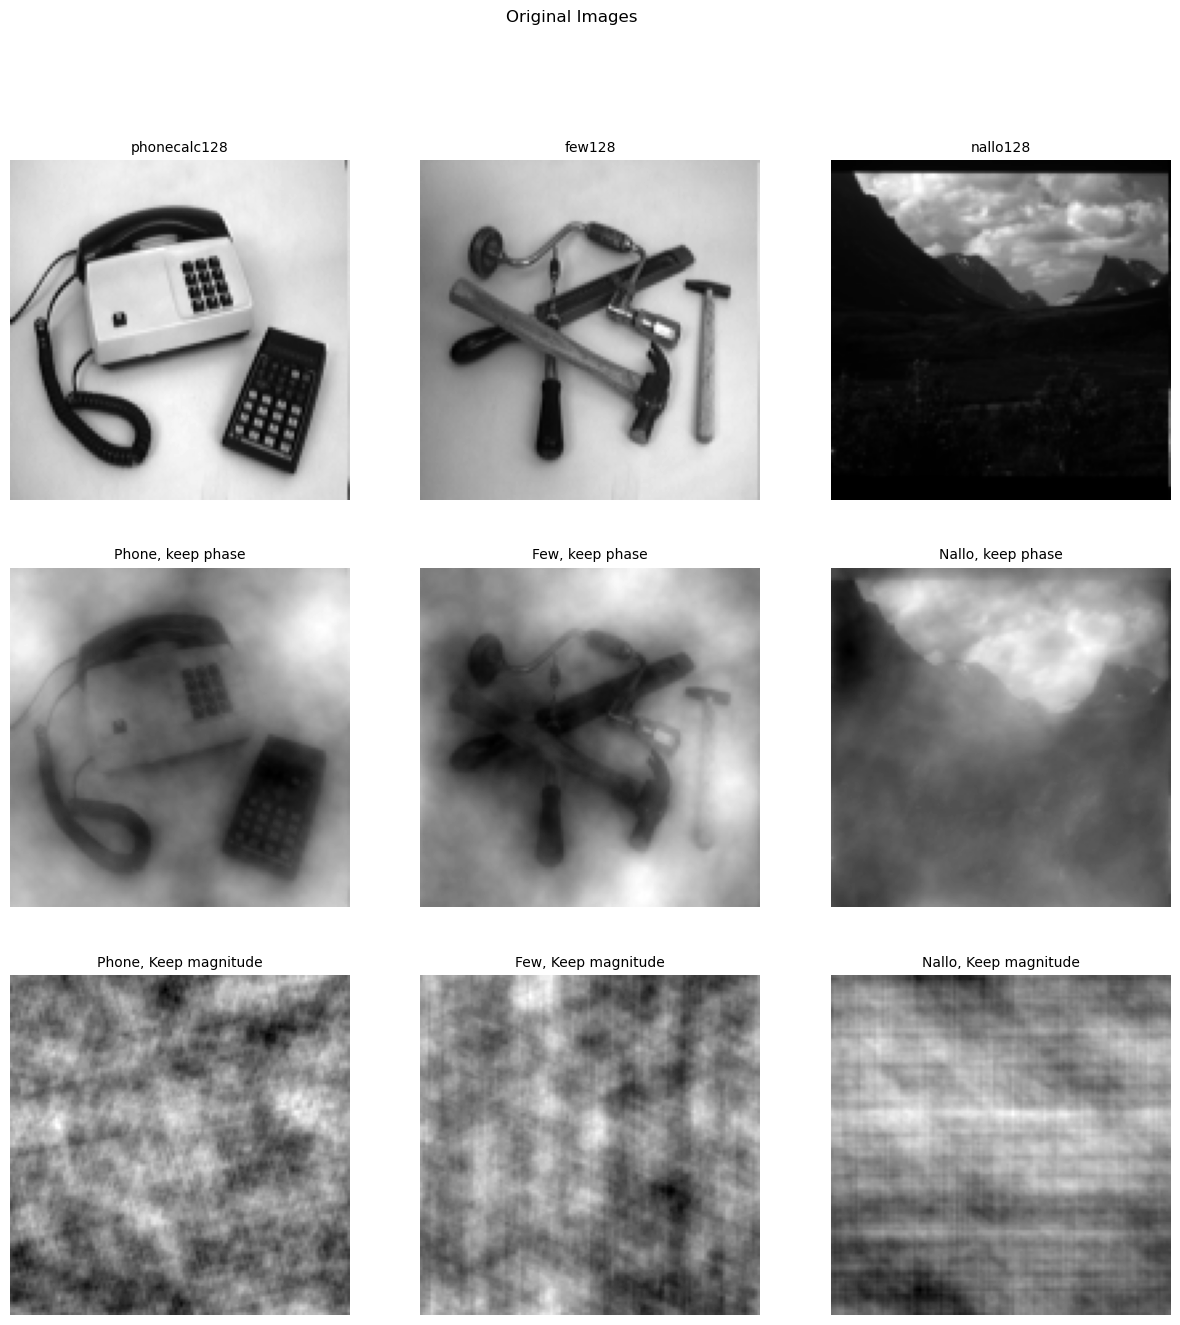

In [33]:
# Create 3 x 3 box plot with each image in the first row, second row should contain images changed by pow2image() function and the third should be the images changed by the function randphaseimage()

def question13():
  images = [np.load("Images-npy/phonecalc128.npy"), np.load("Images-npy/few128.npy"), np.load("Images-npy/nallo128.npy")]
  titles_1 = ["phonecalc128", "few128", "nallo128"]
  titles_2 = ["Phone, keep phase", "Few, keep phase", "Nallo, keep phase"]

  titles_3= ["Phone, Keep magnitude", "Few, Keep magnitude", "Nallo, Keep magnitude"]


  fig, axs = plt.subplots(3, 3, figsize=(15, 15))
  fig.suptitle("Original Images")
  for i in range(3):
    axs[0, i].imshow(images[i], cmap="gray")
    axs[0, i].set_title(titles_1[i])
    axs[0, i].axis("off")

  for i in range(3):
    axs[1, i].imshow(pow2image(images[i]), cmap="gray")
    axs[1, i].set_title(titles_2[i])
    axs[1, i].axis("off")

  for i in range(3):
    axs[2, i].imshow(randphaseimage(images[i]), cmap="gray")
    axs[2, i].set_title(titles_3[i])
    axs[2, i].axis("off")

  plt.show()

question13()

### Question 13 
What information is contained in the phase and in the magnitude of the Fourier Transform

**Answer** <br>
The phase component of a signal contains information about the strcuture, positionen of ojbects within an image/signal. It contains information about the edges of the image however the magnitude component contains information about the intensity of the image. Thereby the phase component contains more information than the magnitude component and this is seen in the pictures. 


# Section 2: Gaussian Convolution implemented via FFT 
Here we study how a smoothing filter can be designed using the Fourier transform, in order to perform a 2D Gaussian convolution on images. 


### 2.3 Filtering procudre 
Below is code suggested in the lab.

### Question 14
Show the impulse response and variance for the above mentioned t-values. What are the variances of your discretized Gaussian kernel for t = 0.1, 0.3, 1.0, 10.0 and 100.0?

***Answer*** 

With t =  0.1 , gaussfft has a variance of  [[1.06513806e+02 2.54658516e-11]
 [2.54658516e-11 1.06513806e+02]]
With t =  0.3 , gaussfft has a variance of  [[1.91089566e+03 1.36424205e-11]
 [1.36424205e-11 1.91089566e+03]]
With t =  1 , gaussfft has a variance of  [[3.35197087e+03 1.93267624e-12]
 [1.93267624e-12 3.35197087e+03]]
With t =  10 , gaussfft has a variance of  [[3.72055413e+03 1.49213975e-13]
 [1.49213975e-13 3.72055413e+03]]
With t =  100 , gaussfft has a variance of  [[ 3.16904028e+03 -1.50990331e-14]
 [-1.50990331e-14  3.16904028e+03]]


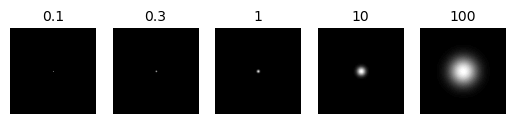

In [72]:
from gaussfft import gaussfft


def gaussianTest():
    pic = deltafcn(128, 128)
    t_values = [0.1, 0.3, 1, 10, 100]
    f = plt.figure()
    f.subplots_adjust(wspace=0.2, hspace=0.2)
    plt.rc("axes", titlesize=10)

    position = 1
    for t in t_values:
        psf = gaussfft(deltafcn(128, 128), t)
        a1 = f.add_subplot(1, len(t_values), position)
        showgrey(gaussfft(psf, t), False)
        a1.title.set_text(t)
        position += 1
        print("With t = ", t, ", gaussfft has a variance of ", variance(psf))
    plt.show()


gaussianTest()

### Question 15:
Are the results different from or similar to the estimated variance? How does the result correspond to the ideal continuous case? Lead: think of the relation between spatial and Fourier domains for different values of t.